In [1]:
import os
import cv2
import json
import random
import numpy as np
from datetime import datetime, timedelta
from osgeo import gdal
from matplotlib import pyplot as plt

In [2]:
DATA_ROOT_DIR = "/Volumes/X/Data/fusion-s1-s2/"

In [3]:
def closest_date(target_date, date_array):
    target = datetime.strptime(target_date, '%Y%m%d')
    date_array = [datetime.strptime(date, '%Y%m%d') for date in date_array]
    closest_date = min(date_array, key=lambda x: abs(target - x))
    return closest_date.strftime('%Y%m%d')

In [4]:
def date_difference(date1, date2):
    d1 = datetime.strptime(date1, '%Y%m%d')
    d2 = datetime.strptime(date2, '%Y%m%d')
    difference = abs(d1 - d2)

    # Convert the difference to 'YYYYMMDD' format
    years = difference.days // 365
    months = (difference.days % 365) // 30
    days = (difference.days % 365) % 30

    return f'{years:04d}{months:02d}{days:02d}'

In [5]:
with open("data/candidates.json", "r") as f:
    candidates = json.load(f)

In [6]:
def closest_date(target_date, date_array):
    target = datetime.strptime(target_date, '%Y%m%d')
    date_array = [d for d in date_array if d != "Store"]
    date_array = [datetime.strptime(date, '%Y%m%d') for date in date_array]
    closest_date = min(date_array, key=lambda x: abs(target - x))
    return closest_date.strftime('%Y%m%d')

ERROR 4: ../project/pix2pix/data/cropped/s2/S2_32VNH_20190405/S2_32VNH_20190405_B02/S2_32VNH_20190405_B02_1191_576780_6228320_256.tif: No such file or directory


AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

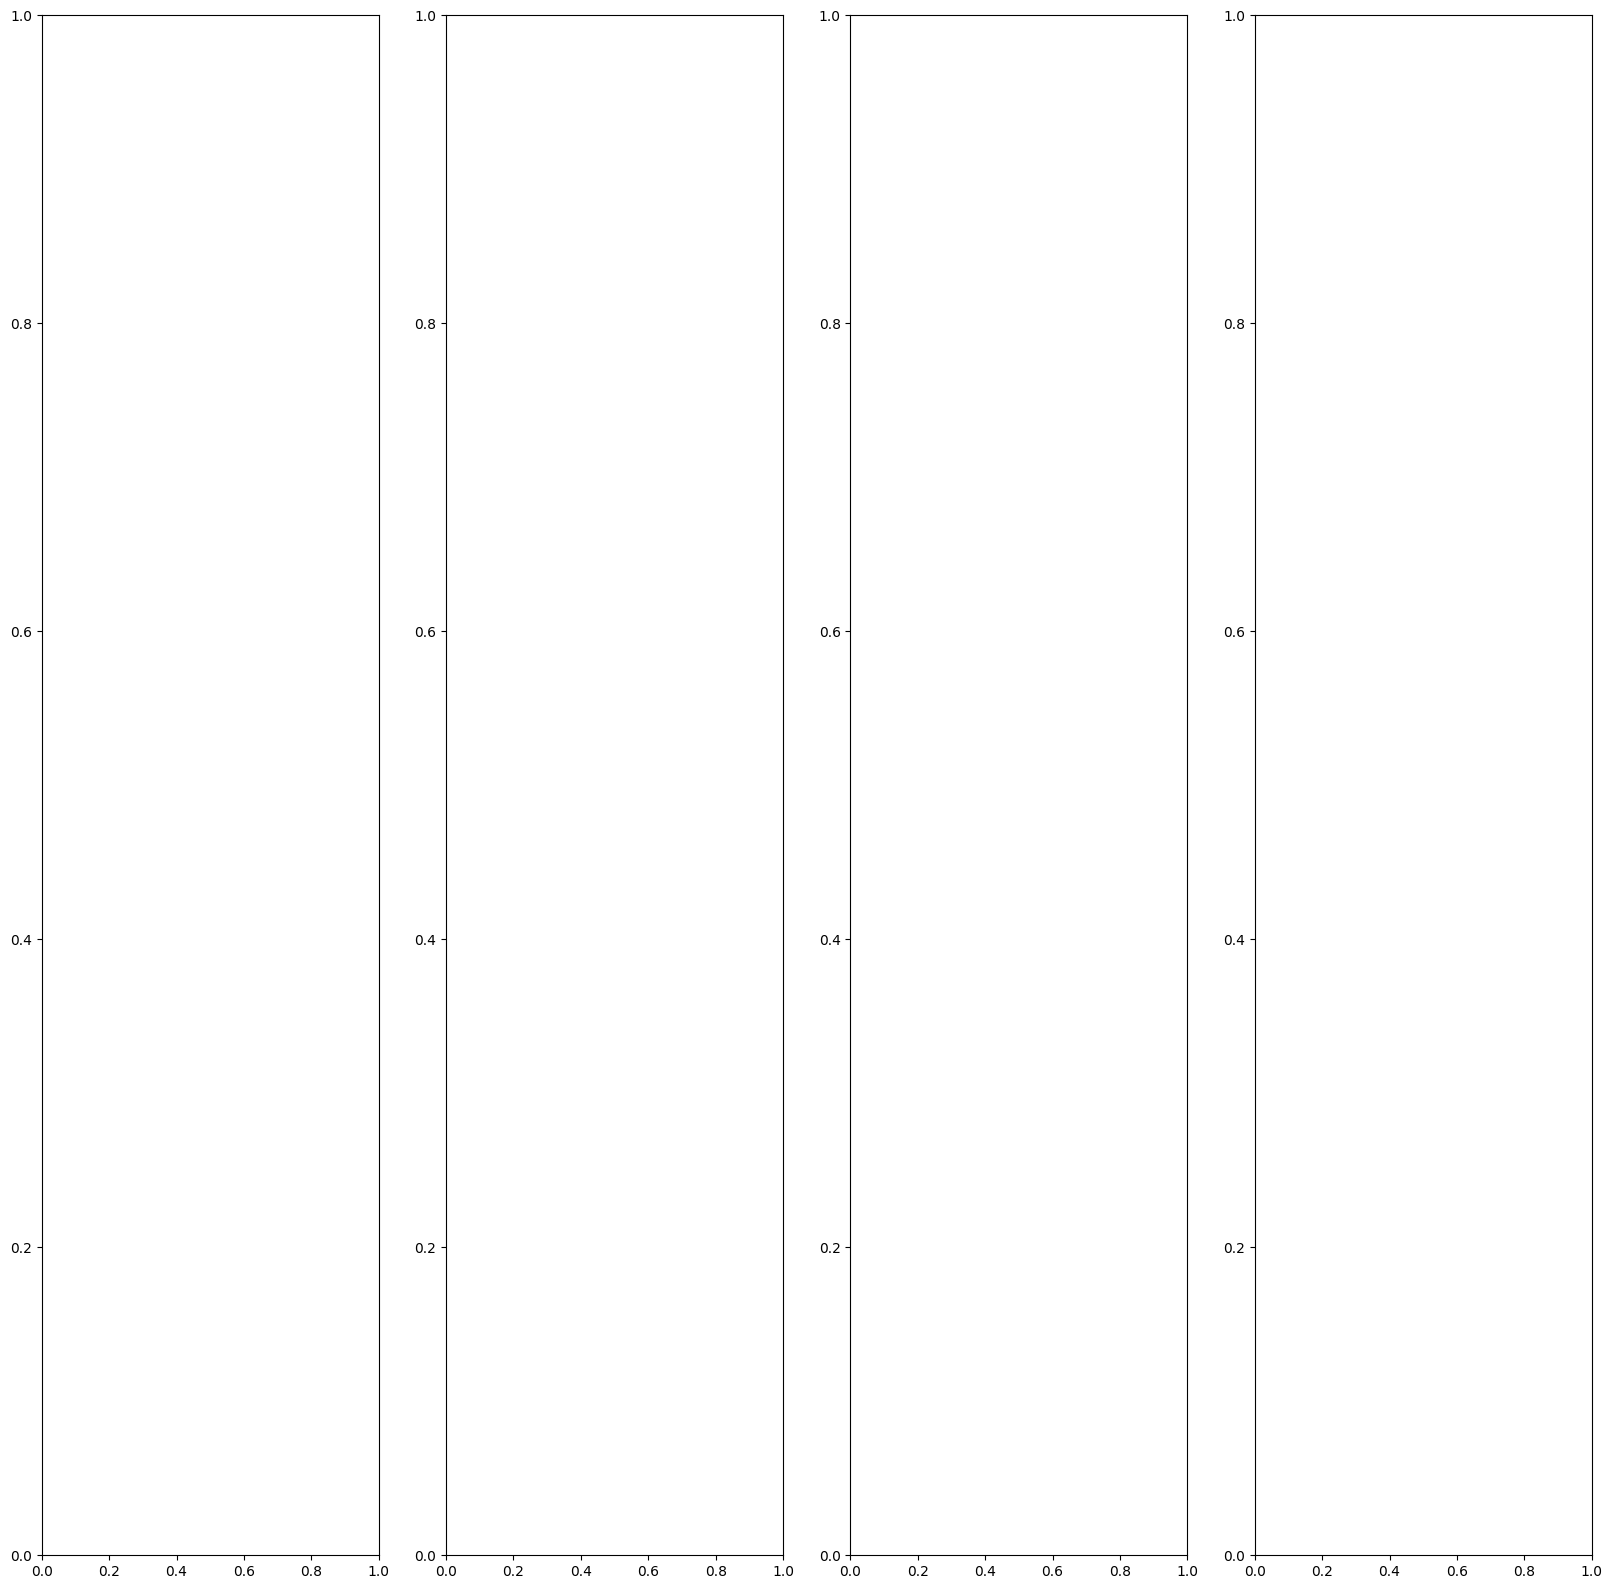

In [7]:
with open("data/candidates.json", "r") as f:
    data = json.load(f)

fig, axes = plt.subplots(1, 4, figsize=(20, 20))


cloudy = "S2_32VNH_20190405_1191_576780_6228320_256"
# cloudy = "S2_32VNH_20190405_873_533260_6246240_256"
# cloudy = "S2_32VNH_20190405_1211_517900_6225760_256"
# cloudy = "S2_32VNH_20190702_443_533260_6271840_256"
date_cloudy = "_".join(cloudy.split("_")[:3])
rest = "_".join(cloudy.split("_")[3:])

cloudy_B02 = gdal.Open(
    f"../project/pix2pix/data/s_cropped/s2/{date_cloudy}/{date_cloudy}_B02/{date_cloudy}_B02_{rest}.tif"
).ReadAsArray()

cloudy_B03 = gdal.Open(
    f"../project/pix2pix/data/s_cropped/s2/{date_cloudy}/{date_cloudy}_B03/{date_cloudy}_B03_{rest}.tif"
).ReadAsArray()

cloudy_B04 = gdal.Open(
    f"../project/pix2pix/data/s_cropped/s2/{date_cloudy}/{date_cloudy}_B04/{date_cloudy}_B04_{rest}.tif"
).ReadAsArray()

cloudy_data = np.stack((cloudy_B04, cloudy_B03, cloudy_B02), axis=-1)/2000

cloud_free = "S2_32VNH_20190329_1191_576780_6228320_256"
# cloud_free = "S2_32VNH_20190413_873_533260_6246240_256"
# cloud_free = "S2_32VNH_20190413_1211_517900_6225760_256"
# cloud_free = "S2_32VNH_20190629_443_533260_6271840_256"
date_cloud_free = "_".join(cloud_free.split("_")[:3])
rest = "_".join(cloud_free.split("_")[3:])

cloud_free_B02 = gdal.Open(
    f"../project/pix2pix/data/s_cropped/s2/{date_cloud_free}/{date_cloud_free}_B02/{date_cloud_free}_B02_{rest}.tif"
).ReadAsArray()

cloud_free_B03 = gdal.Open(
    f"../project/pix2pix/data/s_cropped/s2/{date_cloud_free}/{date_cloud_free}_B03/{date_cloud_free}_B03_{rest}.tif"
).ReadAsArray()

cloud_free_B04 = gdal.Open(
    f"../project/pix2pix/data/s_cropped/s2/{date_cloud_free}/{date_cloud_free}_B04/{date_cloud_free}_B04_{rest}.tif"
).ReadAsArray()

cloud_free_data = np.stack((cloud_free_B04, cloud_free_B03, cloud_free_B02), axis=-1)/2000

### ADDIND SAR DATA ###

s1_dates = [d.split("_")[-1] for d in os.listdir(f"../project/pix2pix/data/cropped/s1/")]
date_s1 = closest_date(date_cloudy.split("_")[-1], s1_dates)
y = int(rest.split("_")[-2]) - 1
rest = "_".join(rest.split("_")[:-2]) + "_" + str(y) + "_256"
os.chdir("../project/pix2pix/")
s1_HV = gdal.Open(f"data/s_cropped/s1/S1_32VNH_{date_s1}/S1_32VNH_{date_s1}_HV/S1_32VNH_{date_s1}_HV_{rest}.vrt").ReadAsArray()
s1_VV = gdal.Open(f"data/s_cropped/s1/S1_32VNH_{date_s1}/S1_32VNH_{date_s1}_VV/S1_32VNH_{date_s1}_VV_{rest}.vrt").ReadAsArray()

axes[0].imshow(cloudy_data)
axes[0].set_title('Cloudy')
axes[0].axis('off')  # Hide axes

# Display image2 in the second subplot
axes[1].imshow(s1_HV)
axes[1].set_title('SAR HV')
axes[1].axis('off')  # Hide axes

# Display image2 in the second subplot
axes[2].imshow(s1_VV)
axes[2].set_title('SAR VV')
axes[2].axis('off')  # Hide axes

# Display image2 in the second subplot
axes[3].imshow(cloud_free_data)
axes[3].set_title('Cloud Free')
axes[3].axis('off')  # Hide axes

# Show the plot
plt.show()
